# Image segmentation

https://ipython-books.github.io/113-segmenting-an-image/

## Setup Project

In [5]:
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


## Start Building up Example

Processing ./buddy.jpg


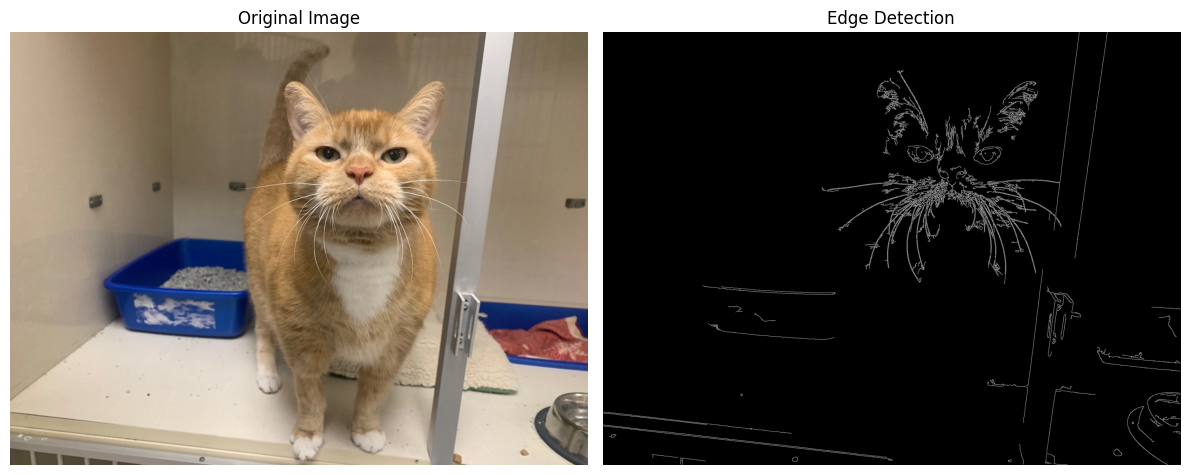

Processing ./dog.jpg


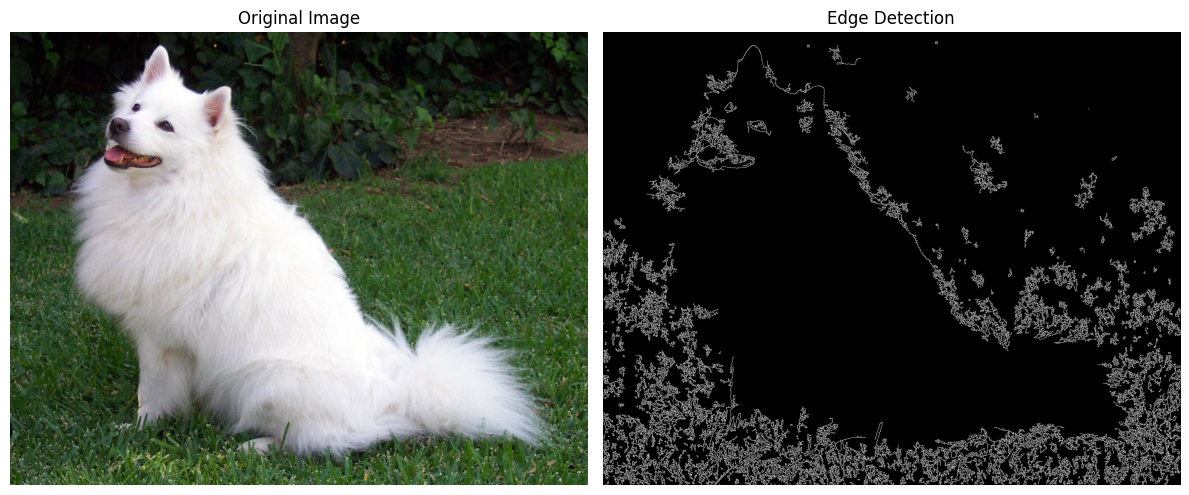

Processing ./lucky.jpg


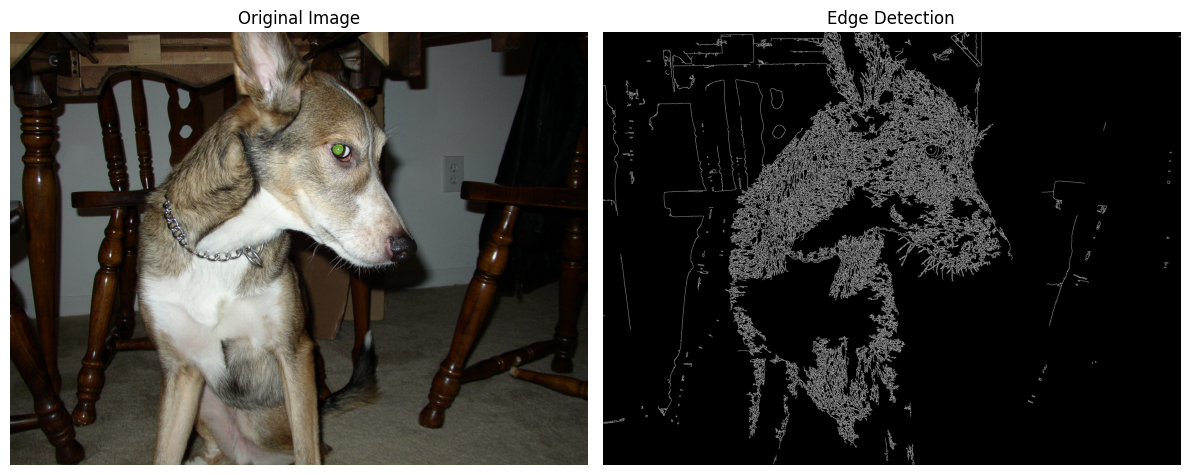

Processing ./MWW_3842.jpg


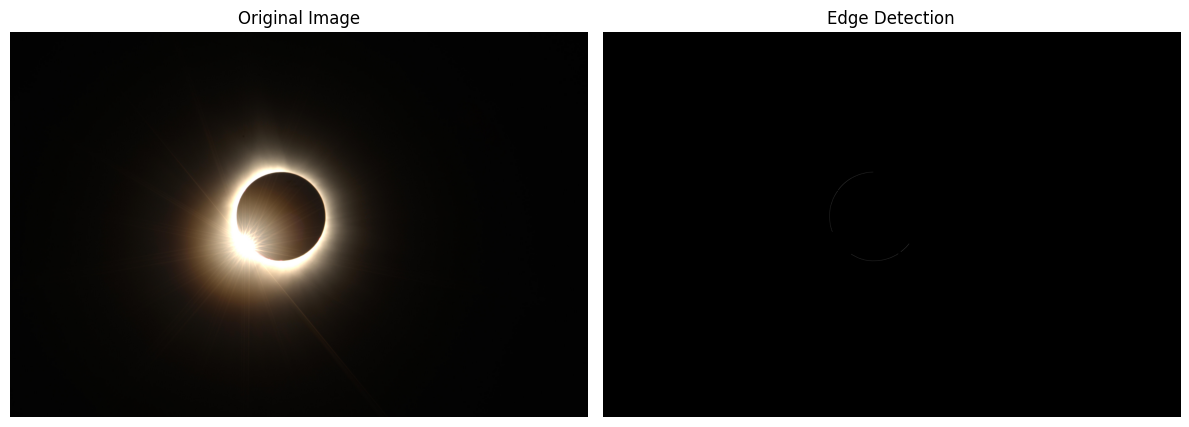

Processing ./q.jpg


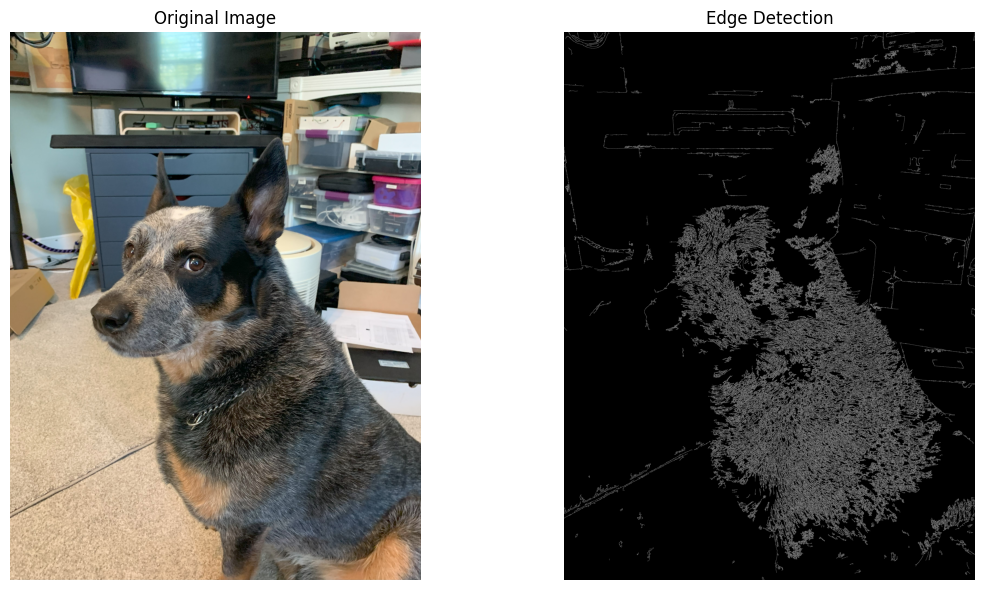

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu, threshold_yen, threshold_li, threshold_local
from skimage.segmentation import clear_border
from skimage.morphology import label, closing, square
from skimage.measure import regionprops
from skimage.feature import canny

def process_image(image_path):
    """
    Process an image using different thresholding techniques and display the results.

    Parameters:
    image_path (str): The path to the image file.
    """
    # Load the image
    image = imread(image_path)

    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Different methods to binarize the image
    # 1. Manual Threshold
    manual_thresh = 0.5
    binary_manual = gray_image > manual_thresh

    # 2. Otsu's Threshold
    otsu_thresh = threshold_otsu(gray_image)
    binary_otsu = gray_image > otsu_thresh

    # 3. Yen's Threshold
    yen_thresh = threshold_yen(gray_image)
    binary_yen = gray_image > yen_thresh

    # 4. Li's Threshold
    li_thresh = threshold_li(gray_image)
    binary_li = gray_image > li_thresh

    # 5. Adaptive Local Thresholding
    block_size = 35
    adaptive_thresh = threshold_local(gray_image, block_size, offset=10)
    binary_adaptive = gray_image > adaptive_thresh

    # Display the original image, grayscale image, and the processed binary images
    fig, axes = plt.subplots(2, 4, figsize=(15, 8), sharex=True, sharey=True)
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title('Original Image')

    ax[1].imshow(gray_image, cmap=plt.cm.gray)
    ax[1].set_title('Grayscale Image')

    ax[2].imshow(binary_manual, cmap=plt.cm.gray)
    ax[2].set_title('Manual Threshold')

    ax[3].imshow(binary_otsu, cmap=plt.cm.gray)
    ax[3].set_title("Otsu's Threshold")

    ax[4].imshow(binary_yen, cmap=plt.cm.gray)
    ax[4].set_title("Yen's Threshold")

    ax[5].imshow(binary_li, cmap=plt.cm.gray)
    ax[5].set_title("Li's Threshold")

    ax[6].imshow(binary_adaptive, cmap=plt.cm.gray)
    ax[6].set_title("Adaptive Threshold")

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

def detect_edges(image_path, sigma=1.0, low_threshold=None, high_threshold=None):
    """
    Perform edge detection using Canny edge detector and display the results.

    Parameters:
    image_path (str): The path to the image file.
    sigma (float): Standard deviation for Gaussian smoothing (default is 1.0).
    low_threshold (float or None): Lower threshold for hysteresis. If None, computed using Otsu's method.
    high_threshold (float or None): Upper threshold for hysteresis. If None, computed as 2x low_threshold.

    """
    # Load the image
    image = imread(image_path)

    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # If thresholds are not provided, compute using Otsu's method
    if low_threshold is None:
        low_threshold = threshold_otsu(gray_image)
    if high_threshold is None:
        high_threshold = 2 * low_threshold

    # Perform Canny edge detection
    edges = canny(gray_image, sigma=sigma, low_threshold=low_threshold, high_threshold=high_threshold)

    # Display the original image and the edges
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    ax = axes.ravel()

    ax[0].imshow(image)
    ax[0].set_title('Original Image')

    ax[1].imshow(edges, cmap=plt.cm.gray)
    ax[1].set_title('Edge Detection')

    for a in ax:
        a.axis('off')

    plt.tight_layout()
    plt.show()

def process_all_images_in_directory(directory_path):
    """
    Process all JPG images in the specified directory using process_image function.

    Parameters:
    directory_path (str): The path to the directory containing JPG images.
    """
    # Loop over all files in the directory
    for filename in os.listdir(directory_path):
        if filename.lower().endswith('.jpg'):
            image_path = os.path.join(directory_path, filename)
            print(f"Processing {image_path}")
            # process_image(image_path)
            detect_edges(image_path, sigma=.01, low_threshold=.1, high_threshold=.9)

# Example usage:
process_all_images_in_directory('./')
